# MNIST with CNN
## Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Load data

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
y_train = train['label']
x_train = train.drop(labels=['label'], axis=1)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [6]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_val   = x_val.values.reshape(-1, 28, 28, 1)
x_test  = test.values.reshape(-1, 28, 28, 1)
y_train = tf.one_hot(y_train, 10)
y_val   = tf.one_hot(y_val, 10)

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(28000, 28, 28, 1)
(33600, 10)
(8400, 10)


## Normalization

In [8]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

## Define model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization, Dropout, Flatten, Dense
import tensorflow.keras as keras

In [10]:
def get_model():

    model = Sequential([
        Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        
        Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.125),
        
        Flatten(),        
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    return model

In [11]:
model = get_model()

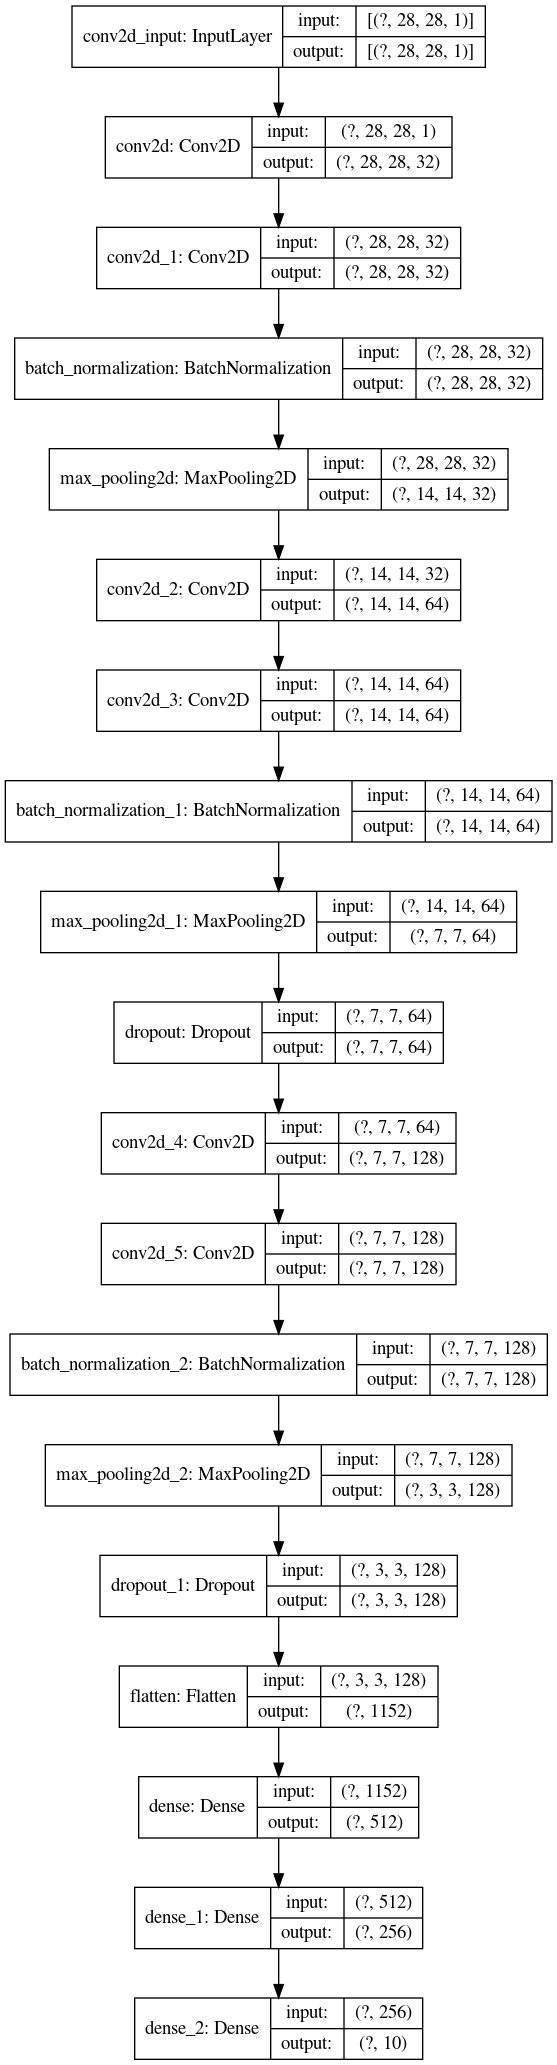

In [12]:
keras.utils.plot_model(model, 'cnn.png', show_shapes=True)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

## Training

In [14]:
history = model.fit(x_train, y_train, batch_size=50, epochs=10, validation_data=(x_val, y_val))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 10s 286us/sample - loss: 0.1748 - categorical_accuracy: 0.9466 - val_loss: 0.1486 - val_categorical_accuracy: 0.9568
Epoch 2/10
33600/33600 [==============================] - 5s 150us/sample - loss: 0.0612 - categorical_accuracy: 0.9813 - val_loss: 0.1431 - val_categorical_accuracy: 0.9575
Epoch 3/10
33600/33600 [==============================] - 5s 145us/sample - loss: 0.0487 - categorical_accuracy: 0.9854 - val_loss: 0.0364 - val_categorical_accuracy: 0.9890
Epoch 4/10
33600/33600 [==============================] - 6s 168us/sample - loss: 0.0406 - categorical_accuracy: 0.9885 - val_loss: 0.0388 - val_categorical_accuracy: 0.9877
Epoch 5/10
33600/33600 [==============================] - 5s 158us/sample - loss: 0.0355 - categorical_accuracy: 0.9892 - val_loss: 0.0474 - val_categorical_accuracy: 0.9861
Epoch 6/10
33600/33600 [==============================] - 5s 149us/sample - loss

In [15]:
history.history

{'loss': [0.17482364325267208,
  0.06120783075532797,
  0.0487259492977154,
  0.040646944559371366,
  0.035522154221450275,
  0.03104519238211521,
  0.027787338462493,
  0.025424931871268222,
  0.025178777514551734,
  0.024163527138046533],
 'categorical_accuracy': [0.94657737,
  0.98130953,
  0.98544645,
  0.9884821,
  0.9891964,
  0.9908036,
  0.99142855,
  0.9922024,
  0.99273807,
  0.99255955],
 'val_loss': [0.14856135892304814,
  0.1431219404884836,
  0.03636305147241122,
  0.03884057211741622,
  0.04742269794847483,
  0.10179461559649401,
  0.04276727343451404,
  0.06159513591323741,
  0.048067391251346896,
  0.03257881886306028],
 'val_categorical_accuracy': [0.95678574,
  0.9575,
  0.98904765,
  0.9877381,
  0.9860714,
  0.9709524,
  0.9892857,
  0.98142856,
  0.9880952,
  0.9913095]}

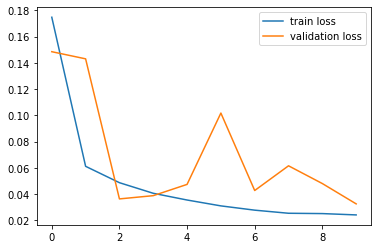

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

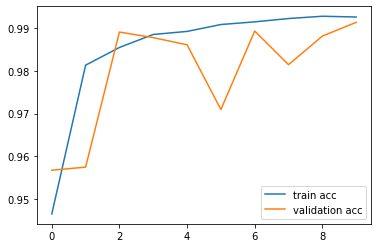

In [17]:
plt.plot(history.history['categorical_accuracy'], label='train acc')
plt.plot(history.history['val_categorical_accuracy'], label='validation acc')
plt.legend()
plt.show()

## Make prediction

In [18]:
prediction = model.predict_classes(x_test)

In [19]:
prediction

array([2, 0, 9, ..., 3, 9, 2])

## Create csv file for submission

In [20]:
submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
submission['Label'] = pd.Series(prediction)

In [21]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [22]:
submission.to_csv("mnist_cnn.csv", index=False)